# Describing Probability distribution and probability distibutins with Multiple variable

## Discribing Distribution

### Standardizing s Distributionn

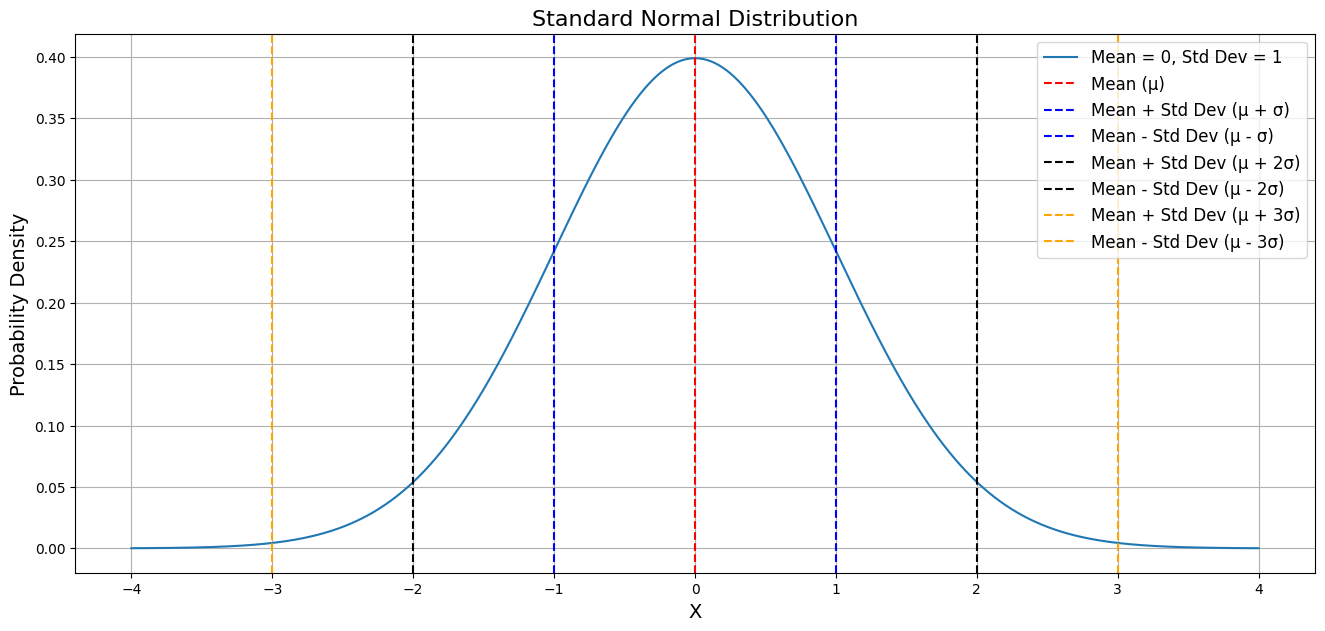

In [ ]:
# Standard Distributin
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mean = 0       # Mean (center of the distribution)
std_dev = 1    # Standard deviation (spread of the distribution)

# Generate data for the normal distribution
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)  # Values from -4σ to +4σ
y = norm.pdf(x, mean, std_dev)  # Probability density function (PDF)

# Plot the standard normal distribution
plt.figure(figsize=(16, 7))
plt.plot(x, y, label=f"Mean = {mean}, Std Dev = {std_dev}")
plt.title("Standard Normal Distribution", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.axvline(mean, color='red', linestyle='--', label='Mean (μ)')
plt.axvline(mean + std_dev, color='blue', linestyle='--', label='Mean + Std Dev (μ + σ)')
plt.axvline(mean - std_dev, color='blue', linestyle='--', label='Mean - Std Dev (μ - σ)')
plt.axvline(mean + 2*std_dev, color='black', linestyle='--', label='Mean + Std Dev (μ + 2σ)')
plt.axvline(mean - 2*std_dev, color='black', linestyle='--', label='Mean - Std Dev (μ - 2σ)')
plt.axvline(mean + 3*std_dev, color='orange', linestyle='--', label='Mean + Std Dev (μ + 3σ)')
plt.axvline(mean - 3*std_dev, color='orange', linestyle='--', label='Mean - Std Dev (μ - 3σ)')
plt.legend(fontsize=12)
plt.grid()
plt.show()


### Skewness and Kurtosis

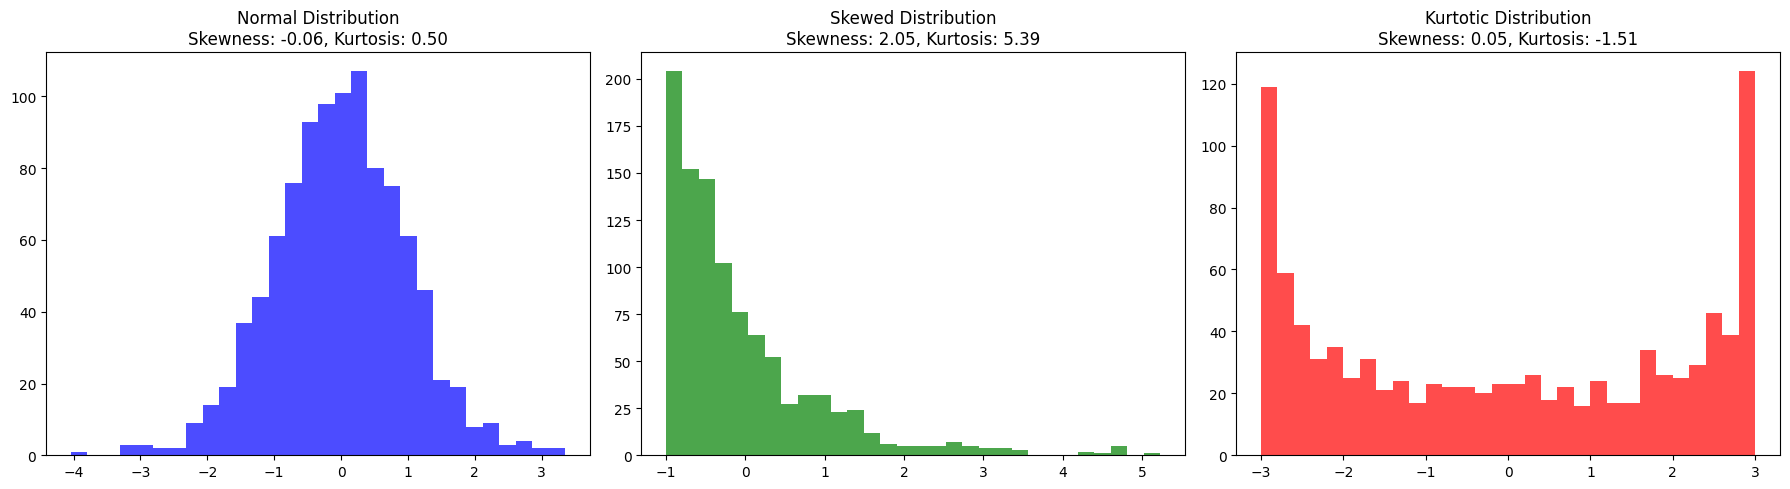

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Generate example data
# Adjust the parameters to create skewed or kurtotic data
data_normal = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution
data_skewed = np.random.exponential(scale=1, size=1000) - 1  # Positively skewed
data_kurtotic = np.random.beta(a=0.5, b=0.5, size=1000) * 6 - 3  # High kurtosis

# Calculate skewness and kurtosis
skewness_normal = skew(data_normal)
kurtosis_normal = kurtosis(data_normal)

skewness_skewed = skew(data_skewed)
kurtosis_skewed = kurtosis(data_skewed)

skewness_kurtotic = skew(data_kurtotic)
kurtosis_kurtotic = kurtosis(data_kurtotic)

# Plot histograms of the distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Normal distribution
axes[0].hist(data_normal, bins=30, color='blue', alpha=0.7)
axes[0].set_title(f"Normal Distribution\nSkewness: {skewness_normal:.2f}, Kurtosis: {kurtosis_normal:.2f}")

# Skewed distribution
axes[1].hist(data_skewed, bins=30, color='green', alpha=0.7)
axes[1].set_title(f"Skewed Distribution\nSkewness: {skewness_skewed:.2f}, Kurtosis: {kurtosis_skewed:.2f}")

# High kurtosis distribution
axes[2].hist(data_kurtotic, bins=30, color='red', alpha=0.7)
axes[2].set_title(f"Kurtotic Distribution\nSkewness: {skewness_kurtotic:.2f}, Kurtosis: {kurtosis_kurtotic:.2f}")

plt.tight_layout()
plt.show()


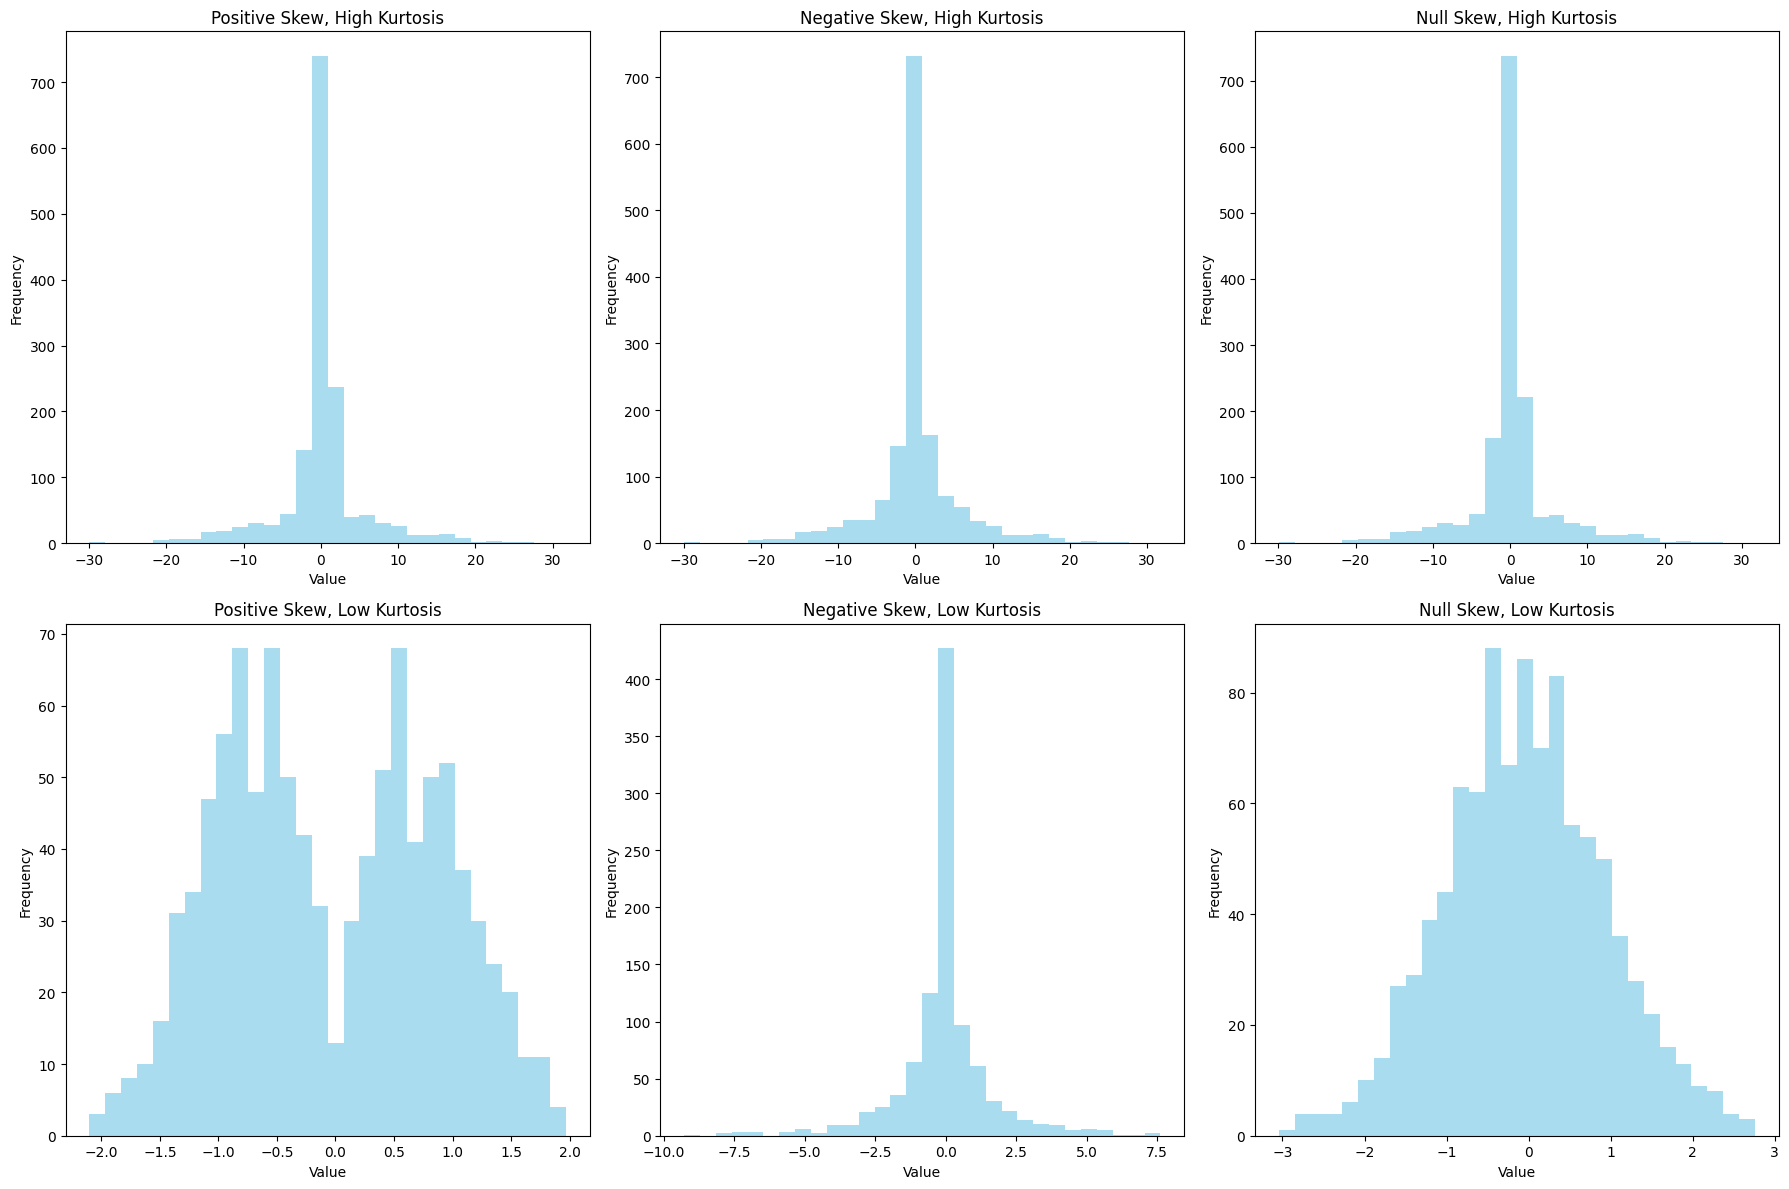

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(skewness=0, kurtosis=0, size=1000):
    np.random.seed(0)
    data = np.random.normal(0, 1, size)
    data = np.sign(data) * np.abs(data)**(1 / (1 + skewness))
    if kurtosis > 0:
        data = np.concatenate([data, np.random.normal(0, 1, int(size * kurtosis)) * 10])
    return data

# Generate data for each combination
params = [
    (0.5, 0.5), (-0.5, 0.5), (0, 0.5),
    (0.5, -0.5), (-0.5, -0.5), (0, 0)
]
titles = [
    "Positive Skew, High Kurtosis", "Negative Skew, High Kurtosis", "Null Skew, High Kurtosis",
    "Positive Skew, Low Kurtosis", "Negative Skew, Low Kurtosis", "Null Skew, Low Kurtosis"
]

plt.figure(figsize=(18, 12))
for i, (skew, kurt) in enumerate(params):
    data = generate_data(skew, kurt)
    plt.subplot(2, 3, i+1)
    plt.hist(data, bins=30, alpha=0.7, color='skyblue')
    plt.title(titles[i])
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Quantiles and Box-Plots

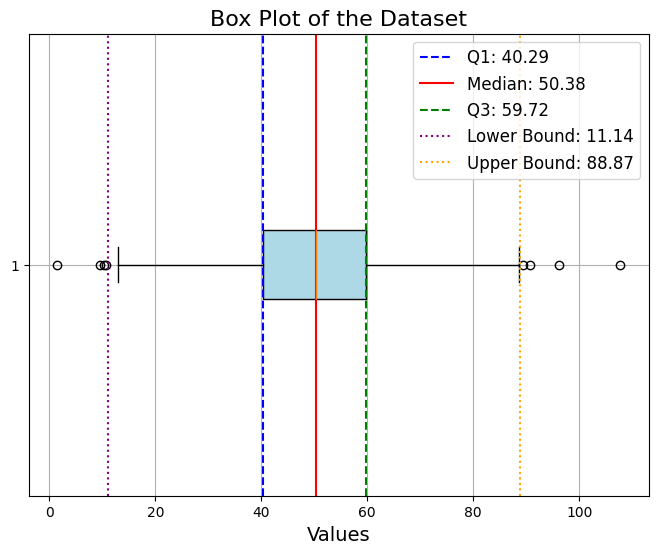

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = np.random.normal(50, 15, 1000)  # Mean=50, Std Dev=15

# Compute quantiles
q1 = np.percentile(data, 25)  # First quartile (25th percentile)
median = np.percentile(data, 50)  # Median (50th percentile)
q3 = np.percentile(data, 75)  # Third quartile (75th percentile)
iqr = q3 - q1  # Interquartile Range (IQR)

# Outlier thresholds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Box Plot of the Dataset", fontsize=16)
plt.xlabel("Values", fontsize=14)

# Add quantile annotations
plt.axvline(q1, color='blue', linestyle='--', label=f"Q1: {q1:.2f}")
plt.axvline(median, color='red', linestyle='-', label=f"Median: {median:.2f}")
plt.axvline(q3, color='green', linestyle='--', label=f"Q3: {q3:.2f}")
plt.axvline(lower_bound, color='purple', linestyle=':', label=f"Lower Bound: {lower_bound:.2f}")
plt.axvline(upper_bound, color='orange', linestyle=':', label=f"Upper Bound: {upper_bound:.2f}")
plt.legend(fontsize=12)
plt.grid()
plt.show()


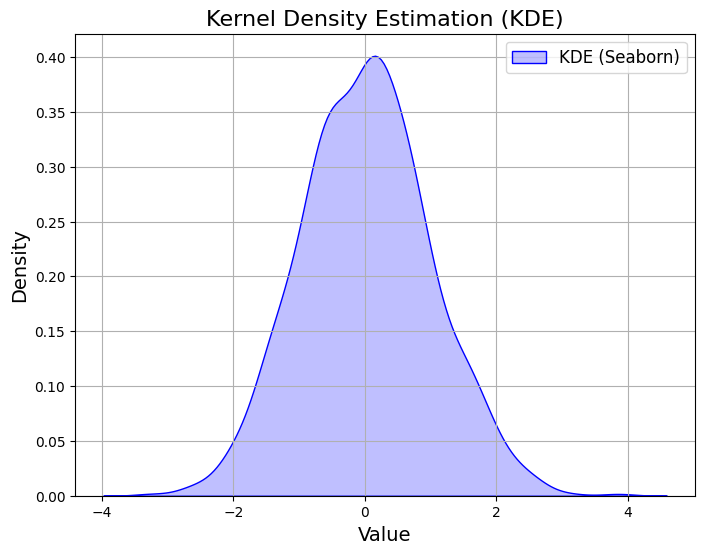

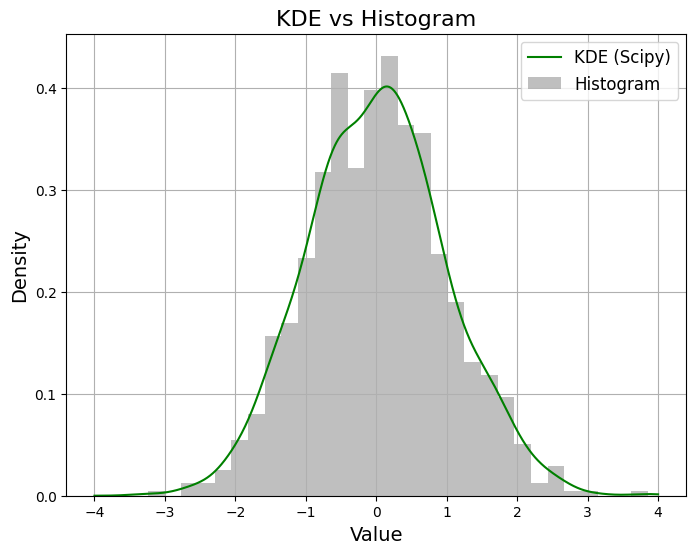

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate random data
np.random.seed(42)
data = np.random.normal(0, 1, 1000)  # Normal distribution with mean=0, std=1

# Using seaborn to plot KDE
plt.figure(figsize=(8, 6))
sns.kdeplot(data, color="blue", fill=True, label="KDE (Seaborn)")
plt.title("Kernel Density Estimation (KDE)", fontsize=16)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# Using scipy to compute and plot KDE
kde = gaussian_kde(data)
x_vals = np.linspace(-4, 4, 1000)
y_vals = kde(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, color="green", label="KDE (Scipy)")
plt.hist(data, bins=30, density=True, alpha=0.5, color="gray", label="Histogram")
plt.title("KDE vs Histogram", fontsize=16)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


`Kernel Density Estimation (KDE)` is a non-parametric way to estimate the probability density function (PDF) of a random variable. Unlike histograms, which divide data into discrete bins, KDE provides a smooth curve that represents the data's distribution.

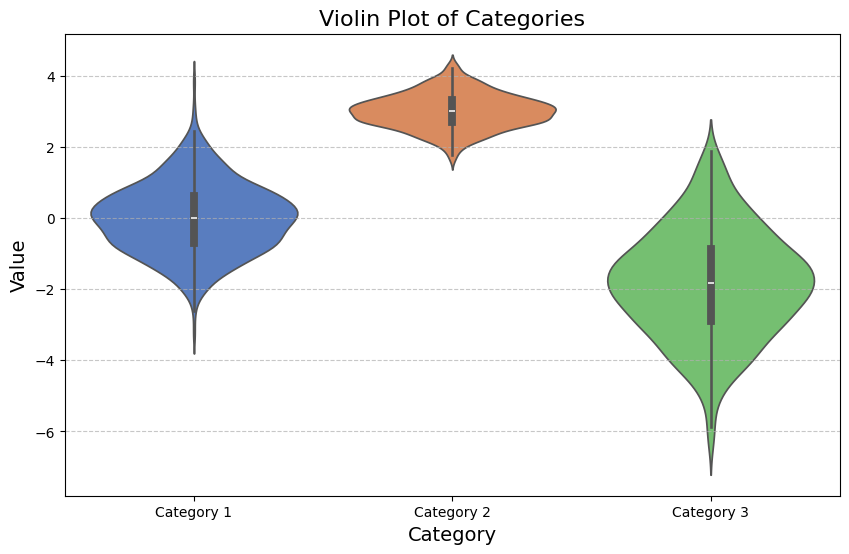

In [ ]:
# Violin Plot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random data for three categories
np.random.seed(42)
data1 = np.random.normal(0, 1, 500)  # Normal distribution
data2 = np.random.normal(3, 0.5, 500)  # Skewed normal
data3 = np.random.normal(-2, 1.5, 500)  # Wider distribution

# Combine data into a single structure
data = [data1, data2, data3]
labels = ['Category 1', 'Category 2', 'Category 3']

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, palette='muted')
plt.title("Violin Plot of Categories", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


A violin plot is a combination of a box plot and a kernel density estimation (KDE). It provides a detailed visualization of the distribution of data while summarizing key descriptive statistics like the median and interquartile range (IQR).

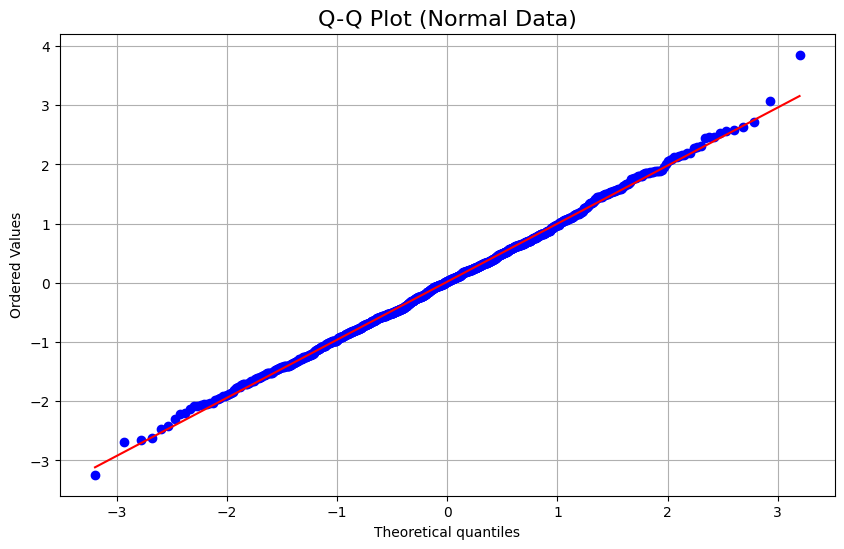

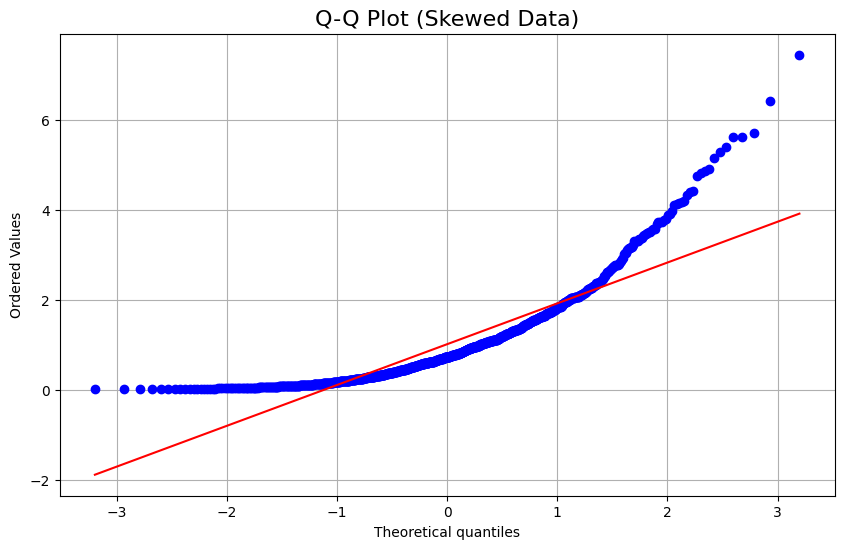

In [ ]:
#  QQ plots
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
normal_data = np.random.normal(0, 1, 1000)  # Normal distribution
skewed_data = np.random.exponential(1, 1000)  # Skewed distribution

# Q-Q Plot for normal data
plt.figure(figsize=(10, 6))
stats.probplot(normal_data, dist="norm", plot=plt)
plt.title("Q-Q Plot (Normal Data)", fontsize=16)
plt.grid()
plt.show()

# Q-Q Plot for skewed data
plt.figure(figsize=(10, 6))
stats.probplot(skewed_data, dist="norm", plot=plt)
plt.title("Q-Q Plot (Skewed Data)", fontsize=16)
plt.grid()
plt.show()


To determine if your data follows a Gaussian distribution using a Q-Q plot, you analyze how closely the points in the plot align with the reference diagonal line (theoretical quantiles of the Gaussian distribution). Here's a detailed explanation:

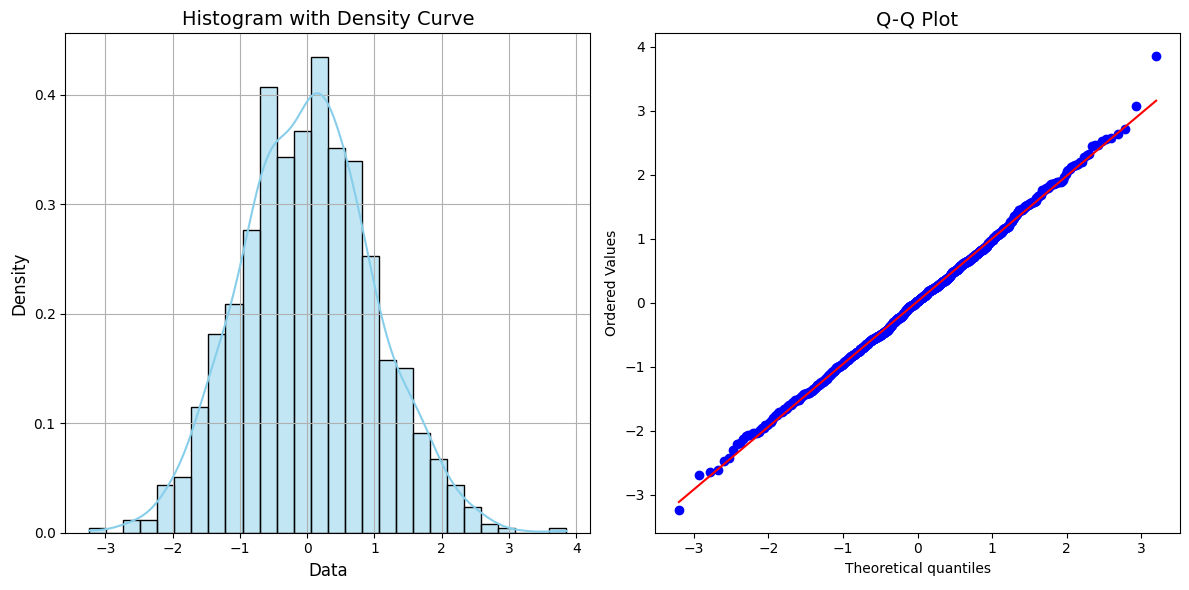

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data (you can replace this with your own data)
np.random.seed(42)
data = np.random.normal(0, 1, 1000)  # Gaussian data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Histogram with density curve
sns.histplot(data, kde=True, stat="density", ax=axes[0], color="skyblue", edgecolor="black")
axes[0].set_title("Histogram with Density Curve", fontsize=14)
axes[0].set_xlabel("Data", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].grid()

# Subplot 2: Q-Q plot
stats.probplot(data, dist="norm", plot=axes[1])
axes[1].get_lines()[1].set_color("red")  # Set the diagonal line to red
axes[1].set_title("Q-Q Plot", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


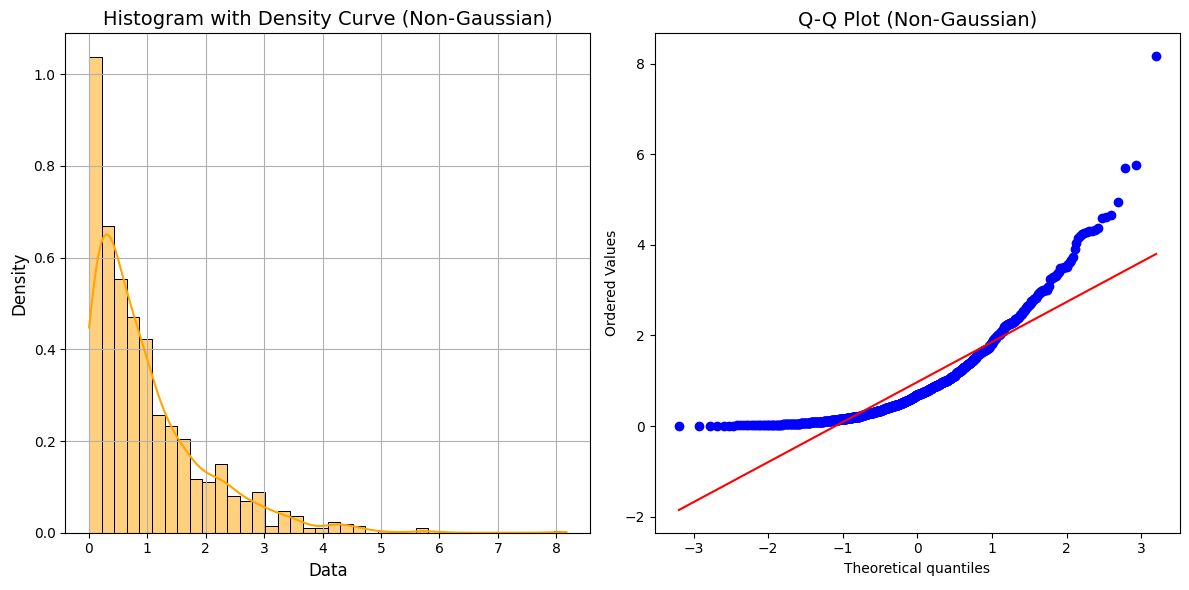

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a non-Gaussian dataset (skewed distribution)
np.random.seed(42)
data_non_gaussian = np.random.exponential(scale=1.0, size=1000)  # Exponential distribution (positive skew)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Histogram with density curve
sns.histplot(data_non_gaussian, kde=True, stat="density", ax=axes[0], color="orange", edgecolor="black")
axes[0].set_title("Histogram with Density Curve (Non-Gaussian)", fontsize=14)
axes[0].set_xlabel("Data", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].grid()

# Subplot 2: Q-Q plot
stats.probplot(data_non_gaussian, dist="norm", plot=axes[1])
axes[1].get_lines()[1].set_color("red")  # Set the diagonal line to red
axes[1].set_title("Q-Q Plot (Non-Gaussian)", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


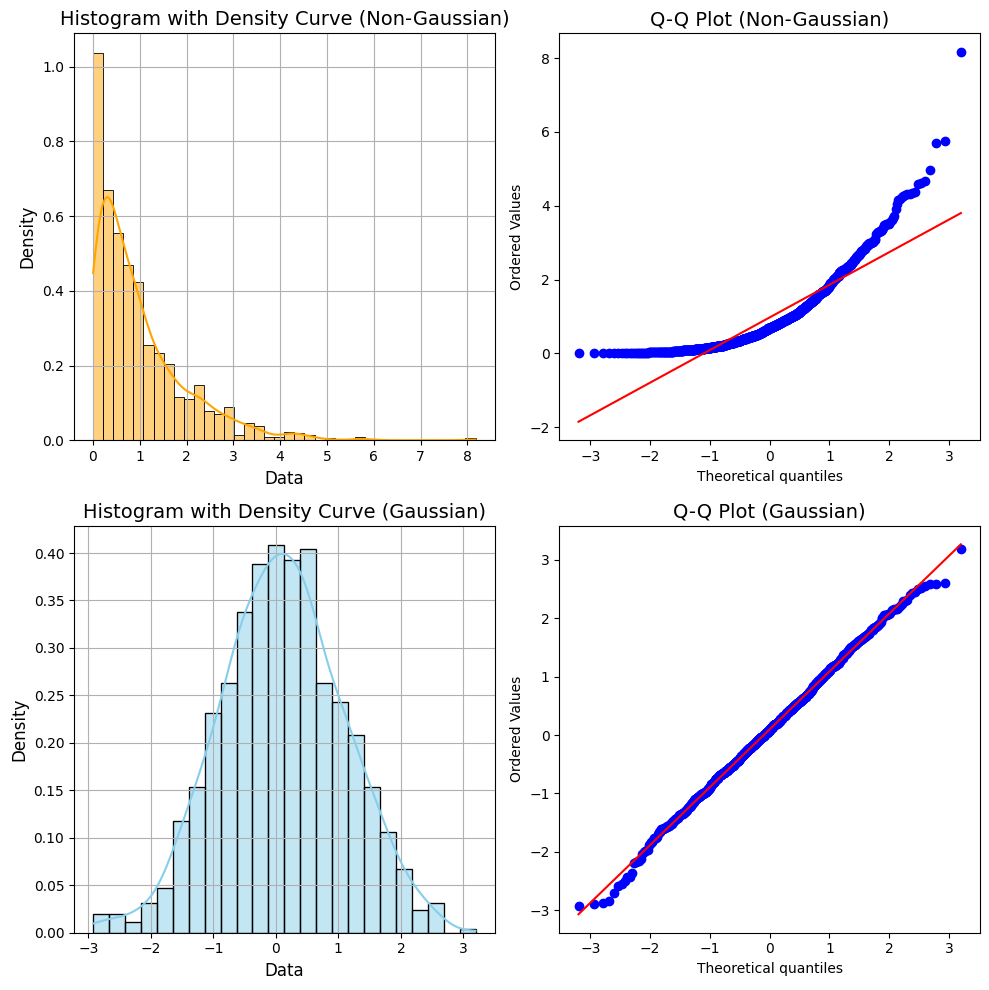

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data for Gaussian and non-Gaussian distributions
np.random.seed(42)

# Non-Gaussian (Exponential distribution)
data_non_gaussian = np.random.exponential(scale=1.0, size=1000)

# Gaussian (Normal distribution)
data_gaussian = np.random.normal(0, 1, 1000)

# Create a figure with 2 rows and 2 columns (4 plots in total)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Subplot 1: Histogram with density curve for non-Gaussian data
sns.histplot(data_non_gaussian, kde=True, stat="density", ax=axes[0, 0], color="orange", edgecolor="black")
axes[0, 0].set_title("Histogram with Density Curve (Non-Gaussian)", fontsize=14)
axes[0, 0].set_xlabel("Data", fontsize=12)
axes[0, 0].set_ylabel("Density", fontsize=12)
axes[0, 0].grid()

# Subplot 2: Q-Q plot for non-Gaussian data
stats.probplot(data_non_gaussian, dist="norm", plot=axes[0, 1])
axes[0, 1].get_lines()[1].set_color("red")  # Set the diagonal line to red
axes[0, 1].set_title("Q-Q Plot (Non-Gaussian)", fontsize=14)

# Subplot 3: Histogram with density curve for Gaussian data
sns.histplot(data_gaussian, kde=True, stat="density", ax=axes[1, 0], color="skyblue", edgecolor="black")
axes[1, 0].set_title("Histogram with Density Curve (Gaussian)", fontsize=14)
axes[1, 0].set_xlabel("Data", fontsize=12)
axes[1, 0].set_ylabel("Density", fontsize=12)
axes[1, 0].grid()

# Subplot 4: Q-Q plot for Gaussian data
stats.probplot(data_gaussian, dist="norm", plot=axes[1, 1])
axes[1, 1].get_lines()[1].set_color("red")  # Set the diagonal line to red
axes[1, 1].set_title("Q-Q Plot (Gaussian)", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


## Probabbility Distribution With Multiple Variables

### Joint Distribution
`What is a Joint Distribution?`
 * A joint distribution describes the probability of two or more random variables occurring simultaneously. For discrete random variables, it is represented by a joint probability mass function (PMF), which gives the probability that each combination of the random variables occurs.

1. **Discret Value**

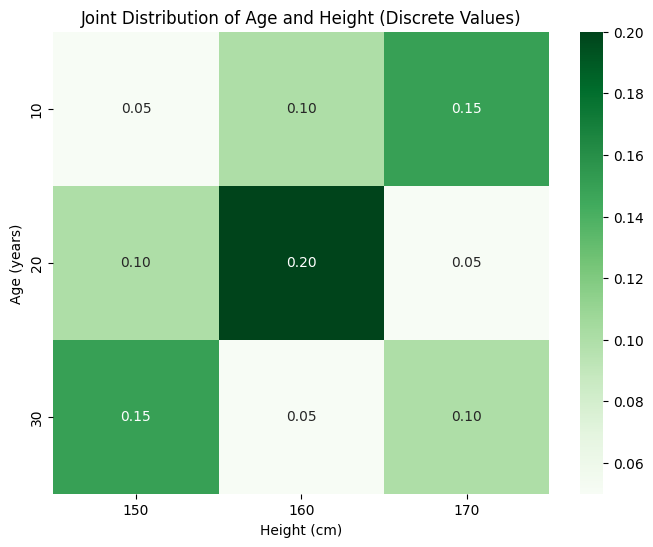

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Joint distribution of age and height as discrete values
# Define the joint probabilities (example values)
joint_prob_table = np.array([
    [0.05, 0.10, 0.15],  # Age = 10
    [0.10, 0.20, 0.05],  # Age = 20
    [0.15, 0.05, 0.10]   # Age = 30
])

# Define the discrete values for age and height
age_values = [10, 20, 30]  # Discrete ages
height_values = [150, 160, 170]  # Discrete heights

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(joint_prob_table, annot=True, fmt=".2f", cmap="Greens", xticklabels=height_values, yticklabels=age_values)
plt.title("Joint Distribution of Age and Height (Discrete Values)")
plt.xlabel("Height (cm)")
plt.ylabel("Age (years)")
plt.show()


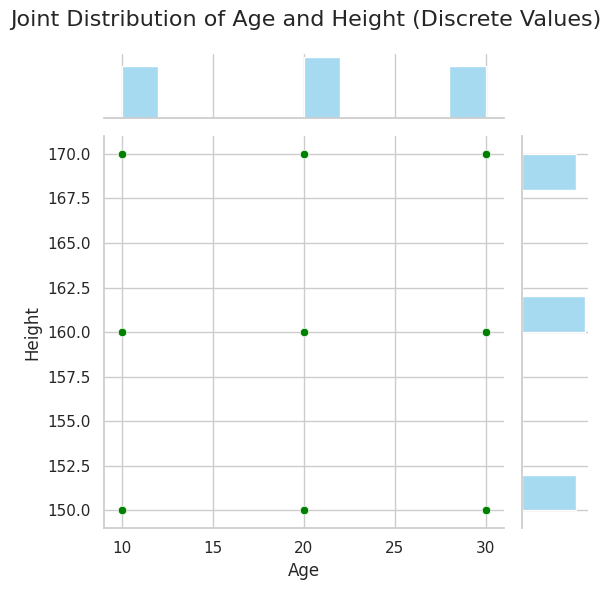

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the discrete age and height values
age_values = [10, 20, 30]  # Discrete ages
height_values = [150, 160, 170]  # Discrete heights

# Generate a dataset based on joint probabilities
joint_prob_table = np.array([
    [0.05, 0.10, 0.15],  # Age = 10
    [0.10, 0.20, 0.05],  # Age = 20
    [0.15, 0.05, 0.10]   # Age = 30
])

# Expand the probabilities into a dataset
data = []
for i, age in enumerate(age_values):
    for j, height in enumerate(height_values):
        count = int(joint_prob_table[i, j] * 1000)  # Scale probabilities to counts
        data.extend([(age, height)] * count)

# Convert to a DataFrame
df = pd.DataFrame(data, columns=["Age", "Height"])

# Plot the scatter plot with marginal histograms
sns.set(style="whitegrid")
joint_plot = sns.jointplot(
    data=df,
    x="Age",
    y="Height",
    kind="scatter",
    marginal_kws=dict(bins=10, fill=True, color="skyblue"),
    color="green"
)
joint_plot.fig.suptitle("Joint Distribution of Age and Height (Discrete Values)", fontsize=16)
joint_plot.fig.tight_layout()
plt.show()


2. **Continuous Values**

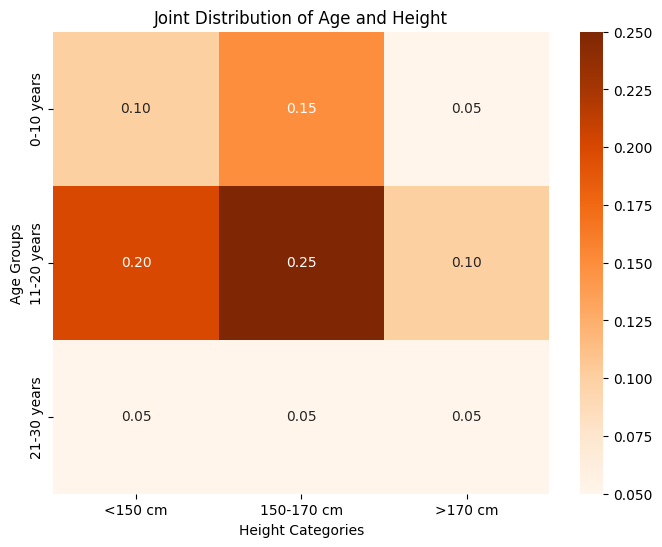

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Joint distribution of age groups (X) and height categories (Y)
# Define joint probabilities (example values)
joint_prob_table = np.array([
    [0.10, 0.15, 0.05],  # Age group 1 (e.g., 0-10 years)
    [0.20, 0.25, 0.10],  # Age group 2 (e.g., 11-20 years)
    [0.05, 0.05, 0.05]   # Age group 3 (e.g., 21-30 years)
])

# Define the labels for age groups (rows) and height categories (columns)
age_labels = ['0-10 years', '11-20 years', '21-30 years']
height_labels = ['<150 cm', '150-170 cm', '>170 cm']

# Plot the heatmap for the joint distribution
plt.figure(figsize=(8, 6))
sns.heatmap(joint_prob_table, annot=True, fmt=".2f", cmap="Oranges", xticklabels=height_labels, yticklabels=age_labels)
plt.title("Joint Distribution of Age and Height")
plt.xlabel("Height Categories")
plt.ylabel("Age Groups")
plt.show()


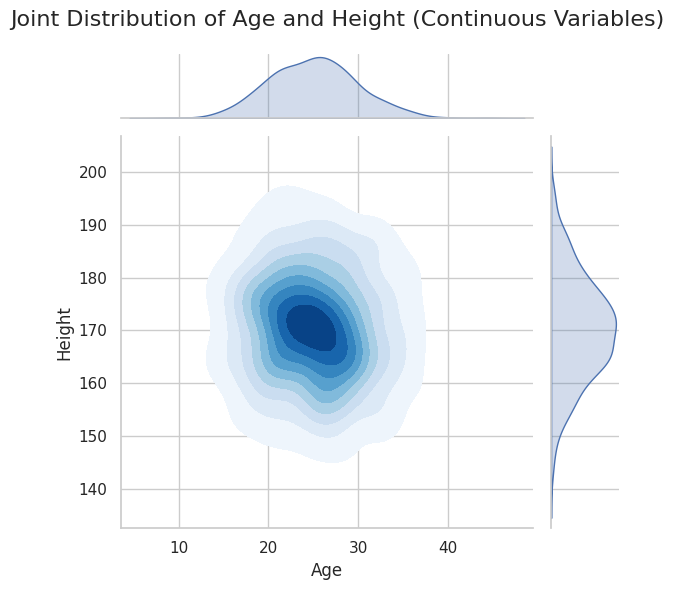

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data for continuous age and height values
np.random.seed(42)
ages = np.random.normal(25, 5, 500)  # Continuous age values, mean=25, std=5
heights = np.random.normal(170, 10, 500)  # Continuous height values, mean=170, std=10

# Create a DataFrame for the data
data = pd.DataFrame({'Age': ages, 'Height': heights})

# Joint plot to visualize the relationship
sns.set(style="whitegrid")
joint_plot = sns.jointplot(
    data=data,
    x="Age",
    y="Height",
    kind="kde",  # Kernel density estimation for continuous variables
    fill=True,   # Fill the KDE plot with colors
    cmap="Blues" # Color map for the KDE plot
)
joint_plot.fig.suptitle("Joint Distribution of Age and Height (Continuous Variables)", fontsize=16)
joint_plot.fig.tight_layout()
plt.show()


### Covariance

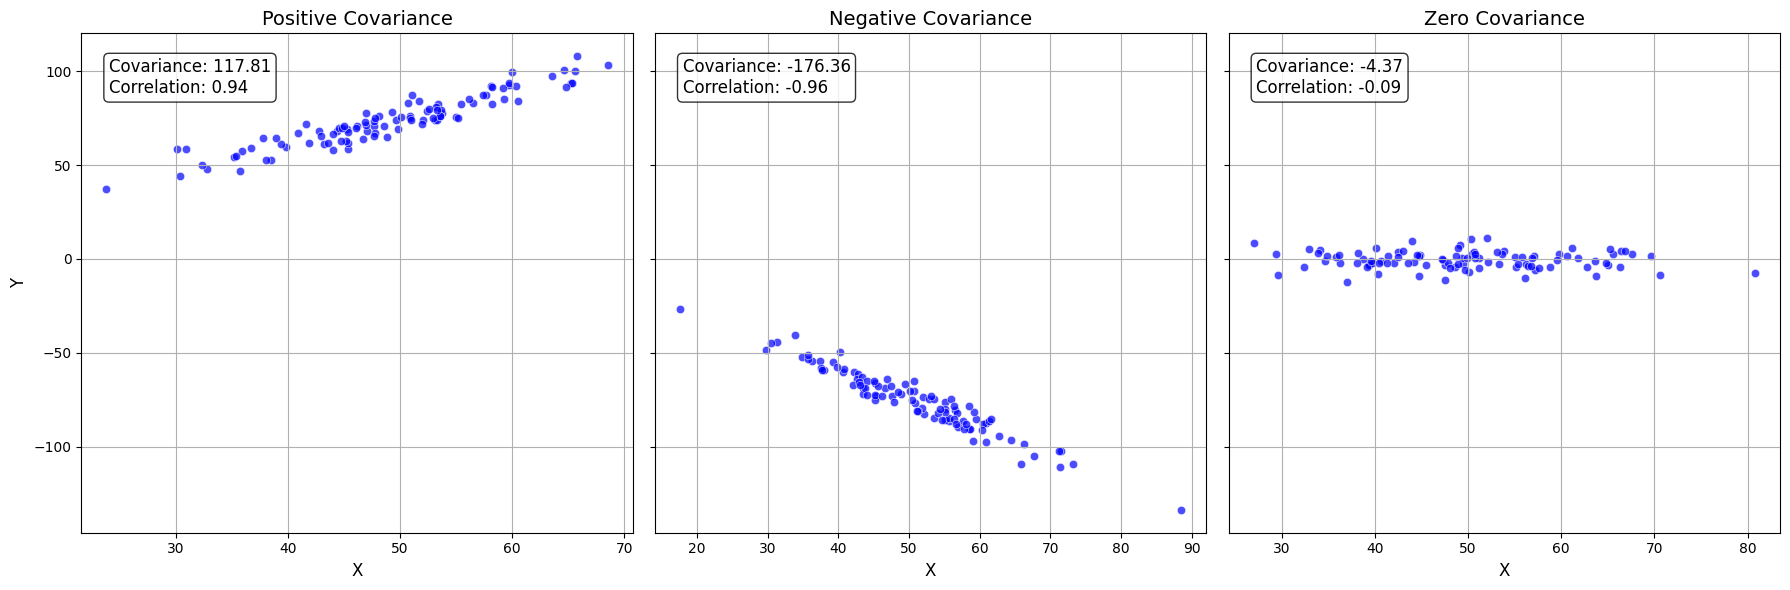

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate three datasets to illustrate different covariance cases
np.random.seed(42)

# Positive covariance
x1 = np.random.normal(50, 10, 100)
y1 = x1 * 1.5 + np.random.normal(0, 5, 100)  # Strong positive linear relationship

# Negative covariance
x2 = np.random.normal(50, 10, 100)
y2 = -x2 * 1.5 + np.random.normal(0, 5, 100)  # Strong negative linear relationship

# Zero covariance
x3 = np.random.normal(50, 10, 100)
y3 = np.random.normal(0, 5, 100)  # No relationship

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define datasets
datasets = [(x1, y1, "Positive Covariance"), (x2, y2, "Negative Covariance"), (x3, y3, "Zero Covariance")]

# Plot each case
for i, (x, y, title) in enumerate(datasets):
    ax = axes[i]
    sns.scatterplot(x=x, y=y, ax=ax, color="blue", alpha=0.7)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("X", fontsize=12)
    ax.set_ylabel("Y", fontsize=12)
    ax.grid()

    # Calculate covariance and correlation coefficient
    covariance_matrix = np.cov(x, y)
    correlation_coefficient = np.corrcoef(x, y)[0, 1]
    covariance = covariance_matrix[0, 1]

    # Annotate plot with values
    ax.text(0.05, 0.95, f"Covariance: {covariance:.2f}\nCorrelation: {correlation_coefficient:.2f}",
            transform=ax.transAxes, fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

# Show plot
plt.tight_layout()
plt.show()


#### 1. Positive Covariance

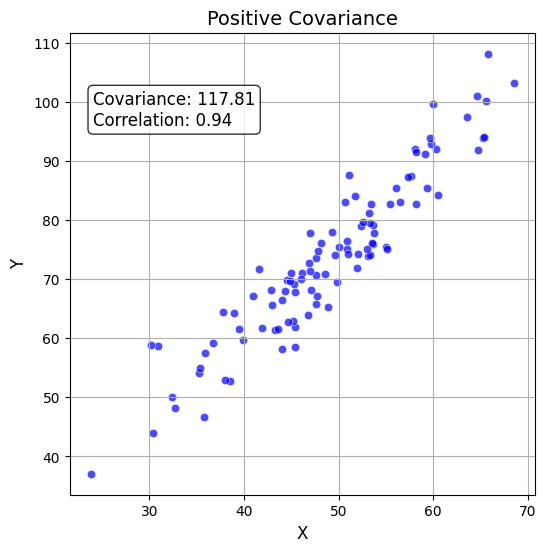

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate Positive Covariance Data
np.random.seed(42)
x1 = np.random.normal(50, 10, 100)
y1 = x1 * 1.5 + np.random.normal(0, 5, 100)

# Plot Positive Covariance
plt.figure(figsize=(6, 6))
sns.scatterplot(x=x1, y=y1, color="blue", alpha=0.7)
cov_matrix = np.cov(x1, y1)
corr_coef = np.corrcoef(x1, y1)[0, 1]
cov_value = cov_matrix[0, 1]

plt.title("Positive Covariance", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.grid()
plt.text(0.05, 0.80, f"Covariance: {cov_value:.2f}\nCorrelation: {corr_coef:.2f}",
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))
plt.show()


#### 2. Negative Covariance

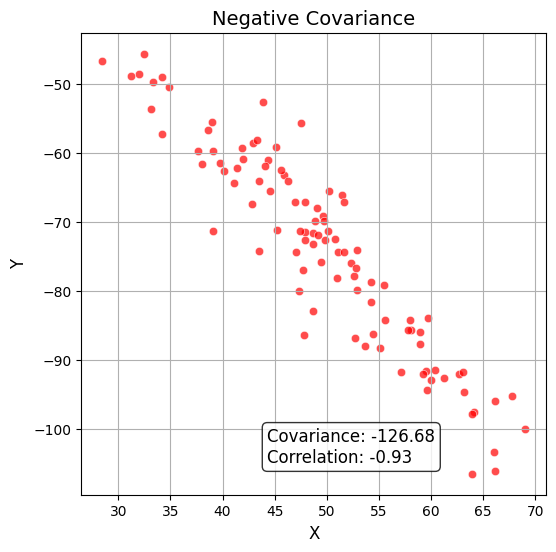

In [11]:
# Generate Negative Covariance Data
x2 = np.random.normal(50, 10, 100)
y2 = -x2 * 1.5 + np.random.normal(0, 5, 100)

# Plot Negative Covariance
plt.figure(figsize=(6, 6))
sns.scatterplot(x=x2, y=y2, color="red", alpha=0.7)
cov_matrix = np.cov(x2, y2)
corr_coef = np.corrcoef(x2, y2)[0, 1]
cov_value = cov_matrix[0, 1]

plt.title("Negative Covariance", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.grid()
plt.text(0.4, 0.07, f"Covariance: {cov_value:.2f}\nCorrelation: {corr_coef:.2f}",
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))
plt.show()


#### 3. Null Covariance

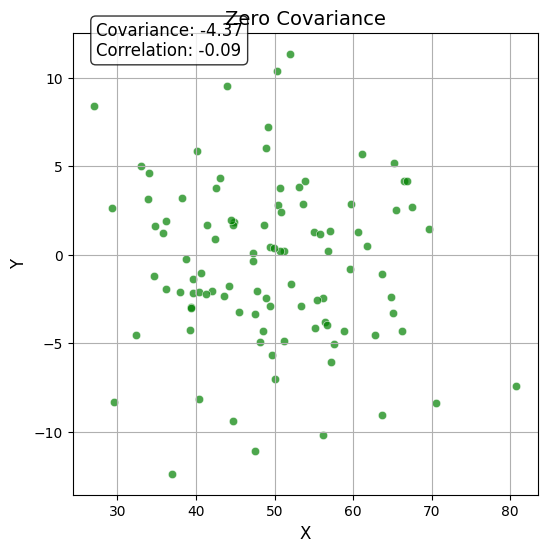

In [4]:
# Generate Zero Covariance Data
x3 = np.random.normal(50, 10, 100)
y3 = np.random.normal(0, 5, 100)

# Plot Zero Covariance
plt.figure(figsize=(6, 6))
sns.scatterplot(x=x3, y=y3, color="green", alpha=0.7)
cov_matrix = np.cov(x3, y3)
corr_coef = np.corrcoef(x3, y3)[0, 1]
cov_value = cov_matrix[0, 1]

plt.title("Zero Covariance", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.grid()
plt.text(0.05, 0.95, f"Covariance: {cov_value:.2f}\nCorrelation: {corr_coef:.2f}",
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))
plt.show()
